In [1]:
##Data set containing covid cases across the world in different countries as well as different colleges in the united states.
##There is also a dataset containing the amount of mask use in different counties across the united states. 
##This is a good dataset for me to predict the amount of cases that can be projected over time based on population density by 
## getting the area of the country. I could also predict how mask use would predict the amount of cases in a county and see the 
## effectiveness of wearing a mask**



In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df1 = pd.read_csv('C:/Users/rishp/OneDrive/Documents/GitHub/DataWranglingCapstone/us-counties.csv')
df2 = pd.read_csv('C:/Users/rishp/OneDrive/Documents/GitHub/DataWranglingCapstone/mask-use-by-county.csv')
print(df1.head())
print(df2.head())

         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0
   COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0      1001  0.053   0.074      0.134       0.295   0.444
1      1003  0.083   0.059      0.098       0.323   0.436
2      1005  0.067   0.121      0.120       0.201   0.491
3      1007  0.020   0.034      0.096       0.278   0.572
4      1009  0.053   0.114      0.180       0.194   0.459


In [3]:
df2 = df2.rename(columns={'COUNTYFP':'fips'})

In [4]:
print(df2.head())

   fips  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0  1001  0.053   0.074      0.134       0.295   0.444
1  1003  0.083   0.059      0.098       0.323   0.436
2  1005  0.067   0.121      0.120       0.201   0.491
3  1007  0.020   0.034      0.096       0.278   0.572
4  1009  0.053   0.114      0.180       0.194   0.459


In [5]:
df = pd.merge(df1,df2, how = 'left', on = 'fips')
print(df.head())

         date     county       state     fips  cases  deaths  NEVER  RARELY  \
0  2020-01-21  Snohomish  Washington  53061.0      1       0  0.017   0.014   
1  2020-01-22  Snohomish  Washington  53061.0      1       0  0.017   0.014   
2  2020-01-23  Snohomish  Washington  53061.0      1       0  0.017   0.014   
3  2020-01-24       Cook    Illinois  17031.0      1       0  0.023   0.021   
4  2020-01-24  Snohomish  Washington  53061.0      1       0  0.017   0.014   

   SOMETIMES  FREQUENTLY  ALWAYS  
0      0.056       0.191   0.721  
1      0.056       0.191   0.721  
2      0.056       0.191   0.721  
3      0.072       0.162   0.722  
4      0.056       0.191   0.721  


In [6]:
df.set_index('fips', inplace = True)
df.head()

,date,county,state,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
fips,,,,,,,,,,
53061.0,2020-01-21,Snohomish,Washington,1,0,0.017,0.014,0.056,0.191,0.721
53061.0,2020-01-22,Snohomish,Washington,1,0,0.017,0.014,0.056,0.191,0.721
53061.0,2020-01-23,Snohomish,Washington,1,0,0.017,0.014,0.056,0.191,0.721
17031.0,2020-01-24,Cook,Illinois,1,0,0.023,0.021,0.072,0.162,0.722
53061.0,2020-01-24,Snohomish,Washington,1,0,0.017,0.014,0.056,0.191,0.721


In [7]:
print(df.isnull().mean()*100)

date          0.000000
county        0.000000
state         0.000000
cases         0.000000
deaths        0.000000
NEVER         3.134189
RARELY        3.134189
SOMETIMES     3.134189
FREQUENTLY    3.134189
ALWAYS        3.134189
dtype: float64


In [8]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [9]:
print(df[row_has_NaN])

               date         county           state  cases  deaths  NEVER  \
fips                                                                       
NaN      2020-03-01  New York City        New York      1       0    NaN   
NaN      2020-03-01        Unknown    Rhode Island      2       0    NaN   
NaN      2020-03-02  New York City        New York      1       0    NaN   
NaN      2020-03-02        Unknown    Rhode Island      2       0    NaN   
NaN      2020-03-03  New York City        New York      2       0    NaN   
...             ...            ...             ...    ...     ...    ...   
NaN      2020-11-10        Unknown         Vermont      9       0    NaN   
78010.0  2020-11-10      St. Croix  Virgin Islands    540       7    NaN   
78020.0  2020-11-10       St. John  Virgin Islands     69       1    NaN   
78030.0  2020-11-10     St. Thomas  Virgin Islands    804      15    NaN   
NaN      2020-11-10        Unknown      Washington      2       2    NaN   

         RA

In [10]:
df = df.dropna(how='any')

In [11]:
df.head()

,date,county,state,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
fips,,,,,,,,,,
53061.0,2020-01-21,Snohomish,Washington,1,0,0.017,0.014,0.056,0.191,0.721
53061.0,2020-01-22,Snohomish,Washington,1,0,0.017,0.014,0.056,0.191,0.721
53061.0,2020-01-23,Snohomish,Washington,1,0,0.017,0.014,0.056,0.191,0.721
17031.0,2020-01-24,Cook,Illinois,1,0,0.023,0.021,0.072,0.162,0.722
53061.0,2020-01-24,Snohomish,Washington,1,0,0.017,0.014,0.056,0.191,0.721


In [12]:
## Mean amount of cases per state

state_case_means = df.groupby('state')[['cases']].mean()
state_case_means.head()

,cases
state,
Alabama,1167.996973
Alaska,202.792954
Arizona,7753.924722
Arkansas,549.036610
California,7145.094261


In [13]:
county_case_means = df.groupby(['county','state'])[['cases']].mean()
county_case_means.head()

,,cases
county,state,
Abbeville,South Carolina,278.894515
Acadia,Louisiana,1604.542735
Accomack,Virginia,858.555085
Ada,Idaho,6385.218107
Adair,Iowa,44.221757


In [14]:
df = df.sort_values(['fips', 'date'], ascending=[True, True])

In [15]:
df.head()

,date,county,state,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
fips,,,,,,,,,,
1001.0,2020-03-24,Autauga,Alabama,1,0,0.053,0.074,0.134,0.295,0.444
1001.0,2020-03-25,Autauga,Alabama,4,0,0.053,0.074,0.134,0.295,0.444
1001.0,2020-03-26,Autauga,Alabama,6,0,0.053,0.074,0.134,0.295,0.444
1001.0,2020-03-27,Autauga,Alabama,6,0,0.053,0.074,0.134,0.295,0.444
1001.0,2020-03-28,Autauga,Alabama,6,0,0.053,0.074,0.134,0.295,0.444


In [16]:
pd.to_datetime(df['date'])

fips
1001.0    2020-03-24
1001.0    2020-03-25
1001.0    2020-03-26
1001.0    2020-03-27
1001.0    2020-03-28
             ...    
56045.0   2020-11-06
56045.0   2020-11-07
56045.0   2020-11-08
56045.0   2020-11-09
56045.0   2020-11-10
Name: date, Length: 696749, dtype: datetime64[ns]

In [17]:
df.head()

,date,county,state,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
fips,,,,,,,,,,
1001.0,2020-03-24,Autauga,Alabama,1,0,0.053,0.074,0.134,0.295,0.444
1001.0,2020-03-25,Autauga,Alabama,4,0,0.053,0.074,0.134,0.295,0.444
1001.0,2020-03-26,Autauga,Alabama,6,0,0.053,0.074,0.134,0.295,0.444
1001.0,2020-03-27,Autauga,Alabama,6,0,0.053,0.074,0.134,0.295,0.444
1001.0,2020-03-28,Autauga,Alabama,6,0,0.053,0.074,0.134,0.295,0.444


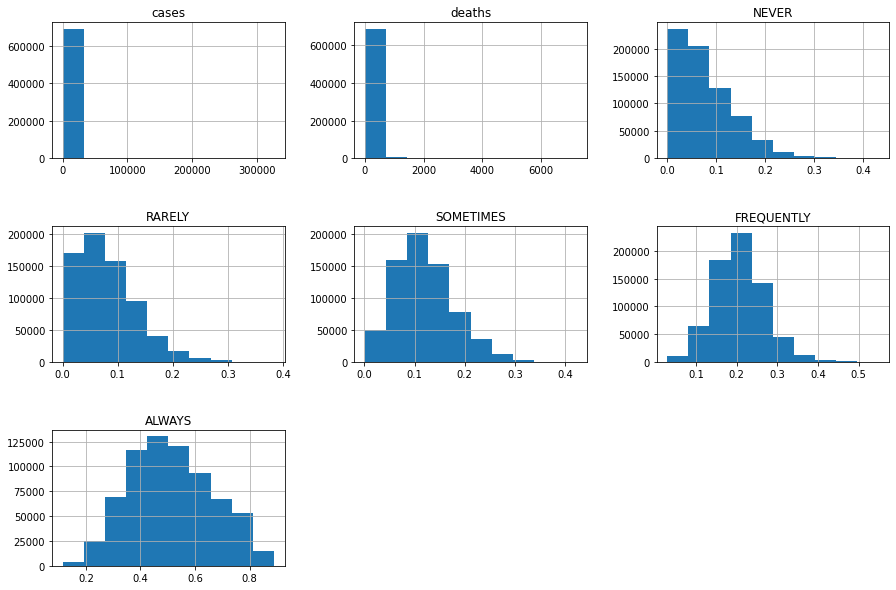

In [20]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)